<a href="https://colab.research.google.com/github/Girish091998/justwatch-movie-data-analysis/blob/main/WS__JUSTWATCH_MOVIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PIP INSTALL

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

#LIB INSTALL

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

#HTML DATA

In [ ]:
# Specifying the URL from which movies related data will be fetched

# WAS GETTING 403 ERROR, so took help online and found this piece of code so that it wont throw 403 error
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
url='https://www.justwatch.com/us/movies'

# Sending an HTTP GET request to the URL
page=requests.get(url, headers= headers)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

#URL's OF MOVIES

In [ ]:
active_links = []
page = 1

while True:
    # Make the request to the API or the page that returns more movies
    response = requests.get(f"{url}?page={page}", headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all movie links
    links = soup.find_all('a', class_="title-list-grid__item--link")
    if not links:
        break  # Exit loop if no more links are found

    for link in links:
        active_links.append('https://www.justwatch.com' + link['href'])

    page += 1  # Increment to next page or offset

print(active_links)
print(len(active_links))
print(active_links.count('NA'))

['https://www.justwatch.com/us/movie/the-fall-guy-2024', 'https://www.justwatch.com/us/movie/civil-war-2024', 'https://www.justwatch.com/us/movie/twisters', 'https://www.justwatch.com/us/movie/kingdom-of-the-planet-of-the-apes', 'https://www.justwatch.com/us/movie/deadpool-3', 'https://www.justwatch.com/us/movie/a-quiet-place-day-one', 'https://www.justwatch.com/us/movie/furiosa', 'https://www.justwatch.com/us/movie/twister', 'https://www.justwatch.com/us/movie/longlegs', 'https://www.justwatch.com/us/movie/ghostbusters-frozen-empire', 'https://www.justwatch.com/us/movie/deadpool-2', 'https://www.justwatch.com/us/movie/deadpool', 'https://www.justwatch.com/us/movie/the-ministry-of-ungentlemanly-warfare', 'https://www.justwatch.com/us/movie/alien', 'https://www.justwatch.com/us/movie/the-bikeriders', 'https://www.justwatch.com/us/movie/challengers', 'https://www.justwatch.com/us/movie/wicked-little-letters', 'https://www.justwatch.com/us/movie/if-2024', 'https://www.justwatch.com/us/mov

#MOVIE's TITLE

In [ ]:
movie_titles = []
for url in active_links:
    try:
        data = requests.get(url, headers=headers)
        soup = BeautifulSoup(data.text, 'html.parser')

        # Extract the movie title
        title_div = soup.find('div', class_='title-detail-hero')
        if title_div:
            h1_tag = title_div.find('h1')
            if h1_tag:
                title = h1_tag.text.strip()
                # Remove the year using regex
                title = re.sub(r'\(\d{4}\)', '', title).strip()
            else:
                title = "NA"
        else:
            title = "NA"
    except Exception as e:
        print(f"Error occurred for URL {url}: {e}")
        title = "NA"

    movie_titles.append(title)

# Print the results
print(movie_titles)
print(len(movie_titles))
print(movie_titles.count('NA'))

['The Fall Guy', 'Civil War', 'Twisters', 'Kingdom of the Planet of the Apes', 'Deadpool & Wolverine', 'A Quiet Place: Day One', 'Furiosa: A Mad Max Saga', 'Twister', 'Longlegs', 'Ghostbusters: Frozen Empire', 'Deadpool 2', 'Deadpool', 'The Ministry of Ungentlemanly Warfare', 'Alien', 'The Bikeriders', 'Challengers', 'Wicked Little Letters', 'IF', 'Abigail', 'The Instigators', 'Ghostbusters: Afterlife', 'I Saw the TV Glow', 'Inside Out 2', 'Despicable Me 4', 'Pulp Fiction', 'MaXXXine', 'Oppenheimer', 'Logan', 'Oddity', 'The Beekeeper', 'Beetlejuice', 'Late Night with the Devil', 'Thelma', 'Immaculate', 'Alien: Covenant', 'Hit Man', 'Bad Boys: Ride or Die', 'Horizon: An American Saga - Chapter 1', 'Godzilla Minus One', 'Love Lies Bleeding', 'Land of Bad', 'Monkey Man', 'It Ends with Us', 'Prometheus', 'Pearl', 'The Union', 'Presumed Innocent', 'Blade', 'Jackpot!', 'In a Violent Nature', 'Trap', 'Fly Me to the Moon', 'Mission: Impossible - Dead Reckoning Part One', 'Hillbilly Elegy', 'Al

In [ ]:
# prompt: from movie_title get all the NA values index number
na_indices = [i for i, title in enumerate(movie_titles) if title == 'NA']
print(na_indices)

[94, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 111, 114, 115, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 190]


#MOVIE's RELEASE YEAR

In [ ]:
# Write Your Code here
import time
release_year = []
for url in active_links:
  try:
    data = requests.get(url,headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    year = soup.find_all('span', class_='release-year')[0].text.strip('()')
    # year = eval(soup.find_all('div',attrs={'class':'title-detail-hero__details'})[0].find_all('span')[0].text.strip())
  except Exception as e:
    year = 'NA'
  release_year.append(year)
  # time.sleep(3)
print(release_year)
print(len(release_year))
print(release_year.count('NA'))

['2024', '2024', '2024', '2024', '2024', '2024', '2024', '1996', '2024', '2024', '2018', '2016', '2024', '1979', '2024', '2024', '2024', '2024', '2024', '2024', '2021', '2024', '2024', '2024', '1994', '2024', '2023', '2017', '2024', '2024', '1988', '2024', '2024', '2024', '2017', '2024', '2024', '2024', '2023', '2024', '2024', '2024', '2024', '2012', '2022', '2024', '1990', '1998', '2024', '2024', '2024', '2024', '2023', '2020', '1986', '2022', '2006', '2024', '2024', '2015', '2000', '2024', '2024', '2001', '2023', '2024', '2024', '2021', '2014', '2023', '2024', '1987', '2018', '2010', '2023', '1981', '2023', '2015', '2023', '2023', '2023', '2009', '2016', '2022', '2017', '2023', '2024', '2023', '2015', '1999', '2008', '2023', '2015', '2024', '2024', '1993', '1975', '2019', '1998', '2024', '2023', '2024', '2009', '2024', '2022', '1992', 'NA', 'NA', '1999', '2024', '1994', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '2000', '2024', '2001', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '

#MOVIE's GENRE

In [ ]:
# Write Your Code here
import time
genre_list = []
for url in active_links:
  try:
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Genres':
        genres = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text
  except:
    genres = 'NA'
  genre_list.append(genres)
  # time.sleep(3)
print(genre_list)
print(len(genre_list))
print(genre_list.count('NA'))

['Comedy, Drama, Romance, Action & Adventure,\xa0Action Comedy', 'Mystery & Thriller, Action & Adventure, War & Military, Drama,\xa0War Epics', 'Mystery & Thriller, Drama,\xa0Disaster,\xa0Action Adventure', 'Science-Fiction, Action & Adventure, Drama, Mystery & Thriller,\xa0Sci-Fi Drama', 'Action & Adventure, Comedy, Science-Fiction,\xa0Superhero', 'Drama, Horror, Science-Fiction, Mystery & Thriller,\xa0SciFi Horror', 'Science-Fiction, Mystery & Thriller,\xa0Action Adventure', 'Drama, Action & Adventure, Mystery & Thriller,\xa0Disaster', 'Crime, Horror, Mystery & Thriller,\xa0Horror Thriller', 'Fantasy, Comedy, Science-Fiction,\xa0Horror Comedy,\xa0Sci-Fi Comedy,\xa0Action Adventure,\xa0Action Comedy', 'Comedy, Action & Adventure, Science-Fiction,\xa0Superhero', 'Action & Adventure, Comedy,\xa0Superhero,\xa0Action Comedy', 'Action & Adventure, Comedy, War & Military,\xa0War Drama', 'Horror, Science-Fiction,\xa0SciFi Horror', 'Crime, Drama,\xa0Organized Crime', 'Romance, Drama, Comedy, 

#MOVIE'S IMDB RATING

In [ ]:
# Write Your Code here
import time
imdb_rating = []
for url in active_links:
  try:
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'poster-detail-infos'}):
      if x.find_all('h3')[0].text=='Rating':
        full_rating_text = x.find_all('div')[0].text.strip()
        rating = re.match(r'\d+\.\d+', full_rating_text).group()
  except:
    rating = 'NA'
  imdb_rating.append(rating)
  # time.sleep(3)
print(imdb_rating)
print(len(imdb_rating))
print(imdb_rating.count('NA'))

['6.9', '7.1', '6.8', '6.8', '8.0', '6.4', '6.4', '6.4', '7.1', '7.1', '7.1', '7.1', '6.8', '6.8', '6.8', '6.8', '6.8', '6.8', '6.8', '6.8', '6.8', '5.9', '7.8', '6.2', '6.2', '6.4', '6.4', '6.4', '7.0', '7.0', '7.0', '7.0', '7.1', '7.1', '7.1', '7.1', '6.7', '6.8', '6.8', '6.8', '6.8', '6.8', '6.8', '6.8', '6.8', '6.8', '6.9', '7.1', '7.1', '7.1', '6.2', '6.8', '6.8', '6.8', '6.8', '6.8', '6.8', '6.8', '7.5', '7.5', '7.5', '7.5', '7.5', '7.5', '7.5', '5.7', '5.7', '5.7', '5.7', '5.7', '6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '7.2', '7.2', '5.7', '8.2', '8.2', '8.2', '8.2', '7.0', '7.0', '7.7', '7.8', '7.8', '7.8', '7.8', '7.4', '7.4', '8.7', '7.8', '7.8', '7.8', '4.3', '4.3', '4.3', '4.3', '5.3', '5.3', '5.3', '5.3', '5.3', '5.3', '5.3', '5.3', '5.3', '5.3', '5.3', '5.3', '5.3', '5.3', '5.3', '7.7', '7.7', '7.3', '9.3', '9.3', '9.3', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5'

#MOVIE'S IMDB %

In [ ]:
# Write Your Code here
#import time
imdb_per = []
for url in active_links:
  try:
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'title-detail-hero-details__item'}):
            span = x.find('span')
            if span:
                rating = span.text.strip()
                break
      # if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Rating':
      #   rating = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text.strip()
  except:
    rating = 'NA'
  imdb_per.append(rating)
  #time.sleep(3)
print(imdb_per)
print(len(imdb_per))
print(imdb_per.count('NA'))

['88%', '85%', '89%', '14.', '96%', '84%', '04.', '23.', '79%', '24.', '33.', '28.', '91%', '02.', '11.', '13.', '29.', '26.', '38.', '21.', '61.', '60%', '95%', '83%', '59.', '76%', '32.', '49.', '72%', '44.', '08.', '41.', '73%', '20.', '09.', '39.', '89%', '78%', '40.', '55.', '80.', '38.', '84%', '06.', '61.', '10.', '90%', '96%', '12.', '51.', '80%', '85%', '64.', '223.', '14.', '27.', '55.', '32.', '92%', '131.', '48.', '78.', '102.', '44.', '87%', '71%', '169.', '47.', '66.', '93.', '68%', '190.', '162.', '93.', '43.', '114.', '70.', '125.', '69.', '76.', '100.', '97%', '74.', '175.', '144.', '79.', '172.', '129.', '58.', '146.', '69.', '145.', '93%', '90.', '77%', '98%', '151.', '89.', '120.', '76%', '161.', '77%', '93%', '307.', '234.', '29.', '96%', '170.', '98%', '7.8 (1.9k)', '16.', '136.', '54%', '116.', '205.', '224.', '66%', '209.', '', '196.', '302.', '103.', '87.', '455.', '125.', '142.', '152.', '368.', '301.', '183.', '91.', '96%', '96%', '96%', '99%', '99%', '99%', 

#MOVIE'S DIRECTOR

In [ ]:
director_name=[]
for url in active_links:
  try:
     content=requests.get(url,headers=headers)
     soup=BeautifulSoup(content.text,'html.parser')
     for x in soup.find_all('div',class_='poster-detail-infos'):
        if x.find_all('h3')[0].text=='Director':
           director=x.find_all('span')[0].text
  except:
    director='NA'
  director_name.append(director)
print(director_name)
print(len(director_name))
print(director_name.count('NA'))

[' David Leitch ', ' Alex Garland ', ' Lee Isaac Chung ', ' Lee Isaac Chung ', ' Shawn Levy ', ' Michael Sarnoski ', ' Michael Sarnoski ', ' Michael Sarnoski ', ' Oz Perkins ', ' Oz Perkins ', ' Oz Perkins ', ' Oz Perkins ', ' Guy Ritchie ', ' Guy Ritchie ', ' Guy Ritchie ', ' Guy Ritchie ', ' Guy Ritchie ', ' Guy Ritchie ', ' Guy Ritchie ', ' Guy Ritchie ', ' Guy Ritchie ', ' Jane Schoenbrun ', ' Kelsey Mann ', ' Chris Renaud ', ' Chris Renaud ', ' Ti West ', ' Ti West ', ' Ti West ', ' Damian Mc Carthy ', ' Damian Mc Carthy ', ' Damian Mc Carthy ', ' Damian Mc Carthy ', ' Josh Margolin ', ' Josh Margolin ', ' Josh Margolin ', ' Josh Margolin ', ' Bilall Fallah ', ' Kevin Costner ', ' Kevin Costner ', ' Kevin Costner ', ' Kevin Costner ', ' Kevin Costner ', ' Justin Baldoni ', ' Justin Baldoni ', ' Justin Baldoni ', ' Justin Baldoni ', ' Alan J. Pakula ', ' Stephen Norrington ', ' Stephen Norrington ', ' Stephen Norrington ', ' M. Night Shyamalan ', ' Greg Berlanti ', ' Greg Berlanti 

#MOVIE'S RUNTIME

In [ ]:
# Write Your Code here
import time
movie_runtime = []
for url in active_links:
  try:

    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':"detail-infos"}):
       if x.find_all('h3',attrs = {'class':'detail-infos__subheading'})[0].text == 'Runtime':
          Runtime = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text

  except:
    Runtime = "NA"
  movie_runtime.append(Runtime)
  # time.sleep(2)
print(movie_runtime)
print(len(movie_runtime))
print(movie_runtime.count('NA'))

['2h 6min', '1h 49min', '2h 3min', '2h 25min', '2h 8min', '1h 39min', '2h 28min', '1h 53min', '1h 41min', '1h 55min', '1h 59min', '1h 48min', '2h 2min', '1h 57min', '1h 56min', '2h 12min', '1h 40min', '1h 44min', '1h 49min', '1h 41min', '2h 4min', '1h 40min', '1h 37min', '1h 34min', '2h 34min', '1h 43min', '3h 0min', '2h 17min', '1h 38min', '1h 45min', '1h 32min', '1h 33min', '1h 38min', '1h 29min', '2h 2min', '1h 55min', '1h 55min', '3h 2min', '2h 4min', '1h 44min', '1h 53min', '2h 1min', '2h 11min', '2h 4min', '1h 43min', '1h 49min', '2h 7min', '2h 0min', '1h 46min', '1h 34min', '1h 45min', '2h 12min', '2h 43min', '1h 57min', '2h 17min', '1h 45min', '1h 24min', '2h 47min', '1h 59min', '2h 13min', '2h 35min', '1h 54min', '1h 41min', '2h 32min', '2h 4min', '1h 42min', '1h 32min', '2h 39min', '2h 49min', '2h 22min', '1h 42min', '1h 54min', '1h 30min', '1h 35min', '2h 4min', '1h 56min', '2h 50min', '1h 56min', '2h 37min', '1h 43min', '1h 35min', '2h 33min', '1h 56min', '1h 47min', '1h 30

#MOVIE'S AGE RATING

In [ ]:
age_rating=[]
for url in active_links:
  try:
     content=requests.get(url,headers=headers)
     soup=BeautifulSoup(content.text,'html.parser')
     for x in soup.find_all('div',class_='detail-infos'):
       if x.find_all('h3')[0].text=='Age rating':
        age=x.find_all('div')[0].text
  except:
    runtime='NA'
  age_rating.append(age)
print(age_rating)
print(len(age_rating))
print(age_rating.count('NA'))

['PG-13', 'R', 'PG-13', 'PG-13', 'R', 'PG-13', 'R', 'PG-13', 'R', 'PG-13', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'PG', 'R', 'R', 'PG-13', 'PG-13', 'PG', 'PG', 'R', 'R', 'R', 'R', 'R', 'R', 'PG', 'R', 'PG-13', 'R', 'R', 'R', 'R', 'R', 'PG-13', 'R', 'R', 'R', 'PG-13', 'R', 'R', 'PG-13', 'R', 'R', 'R', 'R', 'PG-13', 'PG-13', 'PG-13', 'R', 'R', 'R', 'R', 'PG-13', 'R', 'R', 'R', 'R', 'PG-13', 'PG', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'R', 'R', 'R', 'PG-13', 'PG-13', 'PG', 'PG', 'R', 'PG-13', 'PG-13', 'R', 'R', 'R', 'PG-13', 'R', 'PG', 'R', 'PG-13', 'R', 'PG', 'PG-13', 'R', 'R', 'PG-13', 'PG-13', 'PG', 'PG-13', 'PG', 'R', 'PG', 'R', 'PG-13', 'R', 'PG', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'PG-13', 'PG-13', 'PG', 'PG-13', 'R', 'PG-13', 'PG-13', 'R', 'PG-13', 'PG-13', 'R', 'PG-13', 'R', 'R', 'PG', 'R', 'R', 'PG-13', 'PG-13', 'PG-13', 'PG', 'R', 'R', 'R', 'R', 'PG-13', 'PG-13', 'R', 'R', 'R', 'PG-13', 'PG-13', 'R', 'PG-13', 'PG-13', 'R', 'PG-13', 'PG-13', 'PG-13', 'R', 'R', 'R', 'R', '

#MOVIE'S PRODUCTION COUNTRY

In [ ]:
# Write Your Code here
import time
movie_production_country = []
for url in active_links:
  try:
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')

    for x in soup.find_all('div',class_='detail-infos'):
       if x.find_all('h3')[0].text==' Production country ':
        country=x.find_all('div')[0].text
  except:
    country = "NA"
  movie_production_country.append(country)
  # time.sleep(2)
print(movie_production_country)
print(len(movie_production_country))
print(age_rating.count('NA'))

['Australia, Canada, United States', 'United States, United Kingdom', 'United States', 'United States', 'United States', 'United States, United Kingdom, Canada', 'United States, Australia', 'United States', 'Canada, United States', 'United States', 'United States', 'United States', 'United States, United Kingdom, Turkey', 'United States', 'United States', 'Italy, United States', 'France, United Kingdom, United States', 'United States, Canada', 'United States', 'United States', 'Canada, United States', 'United States', 'United States', 'United States', 'United States', 'New Zealand, United States, United Kingdom', 'United States, United Kingdom', 'United States', 'United States, Ireland', 'United Kingdom, United States', 'United States', 'United Arab Emirates, United States, Australia', 'United States, Switzerland', 'United States', 'United States', 'United States', 'United States', 'United States', 'Japan', 'United Kingdom, United States', 'United States, Australia, Czech Republic', 'C

#MOVIE'S STREAMING PROVIDER

In [ ]:
# Write Your Code here
Movie_Streaming_Provider =[]
#import time
for url in active_links:
  try:
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,"html.parser")
    names=[x['alt'] for x in soup.find_all('img',class_='offer__icon')]
  except :
    names = 'NA'
  Movie_Streaming_Provider.append(names)
  #time.sleep(3)
print(Movie_Streaming_Provider)
print(len(Movie_Streaming_Provider))
print(Movie_Streaming_Provider.count('NA'))

[['Apple TV', 'FlixFling', 'Apple TV', 'Amazon Video', 'Microsoft Store', 'FlixFling', 'Spectrum On Demand', 'Apple TV', 'Amazon Video', 'Microsoft Store', 'Fandango'], ['Apple TV', 'FlixFling', 'Apple TV', 'Amazon Video', 'Microsoft Store', 'FlixFling', 'Spectrum On Demand', 'Apple TV', 'Amazon Video', 'Microsoft Store', 'Fandango'], ['Apple TV', 'Apple TV', 'Amazon Video', 'Microsoft Store', 'Spectrum On Demand', 'Apple TV', 'Amazon Video', 'Microsoft Store', 'AMC Theatres', 'Fandango', 'Atom Tickets', 'Cinemark', 'Cinepolis Cinemas', 'Regal Cinemas', 'Harkins Theatres', 'B&B Theatres', 'Marcus Theatres'], ['Apple TV', 'Hulu', 'Amazon Video', 'Apple TV', 'Microsoft Store', 'Fandango', 'B&B Theatres'], ['AMC Theatres', 'Fandango', 'Atom Tickets', 'Cinemark', 'Cinepolis Cinemas', 'Harkins Theatres', 'B&B Theatres', 'Marcus Theatres'], ['Apple TV', 'Apple TV', 'Amazon Video', 'Microsoft Store', 'Spectrum On Demand', 'Apple TV', 'Microsoft Store', 'AMC Theatres', 'Fandango', 'Cinemark', 

#MOVIE's DF

In [ ]:
# Write Your Code here
info = {
    'movies_title': movie_titles,
    'movies_year' : release_year,
    'movies_genre' : genre_list,
    'movies_imdb_rating':imdb_rating,
    'movies_runtime' : movie_runtime,
    'production_country' : movie_production_country,
    'streaming_service' : Movie_Streaming_Provider,
    'movie_link': active_links
}
df = pd.DataFrame(info)

In [ ]:
df

movies_title movies_year  \
0                              The Fall Guy        2024   
1                                 Civil War        2024   
2                                  Twisters        2024   
3         Kingdom of the Planet of the Apes        2024   
4                      Deadpool & Wolverine        2024   
...                                     ...         ...   
1555                                Hit Man        2024   
1556                  Bad Boys: Ride or Die        2024   
1557  Horizon: An American Saga - Chapter 1        2024   
1558                     Godzilla Minus One        2023   
1559                     Love Lies Bleeding        2024   

                                           movies_genre movies_imdb_rating  \
0     Comedy, Drama, Romance, Action & Adventure, Ac...                6.9   
1     Mystery & Thriller, Action & Adventure, War & ...                7.1   
2     Mystery & Thriller, Drama, Disaster, Action Ad...                6.8   
3     Science-Fiction, Action & Adventure, Drama, My...                6.8   
4     Action & Adventure, Comedy, Science-Fiction, S...                8.0   
...                                                 ...                ...   
1555              Comedy, Romance, Crime, Action Comedy                7.1   
1556  Action & Adventure, Crime, Mystery & Thriller,...                6.7   
1557                       Drama, Western, Epic Western                6.8   
1558   Science-Fiction, Horror, Drama, Action Adventure                6.8   
1559  Crime, Romance, Mystery & Thriller, Action & A...                6.8   

     movies_runtime                production_country  \
0           2h 6min  Australia, Canada, United States   
1          1h 49min     United States, United Kingdom   
2           2h 3min                     United States   
3          2h 25min                     United States   
4           2h 8min                     United States   
...             ...                               ...   
1555       1h 55min                     United States   
1556       1h 55min                     United States   
1557        3h 2min                     United States   
1558        2h 4min                             Japan   
1559       1h 44min     United Kingdom, United States   

                                      streaming_service  \
0     [Apple TV, FlixFling, Apple TV, Amazon Video, ...   
1     [Apple TV, FlixFling, Apple TV, Amazon Video, ...   
2     [Apple TV, Apple TV, Amazon Video, Microsoft S...   
3     [Apple TV, Hulu, Amazon Video, Apple TV, Micro...   
4     [AMC Theatres, Fandango, Atom Tickets, Cinemar...   
...                                                 ...   
1555        [Netflix basic with Ads, Netflix, Fandango]   
1556  [Apple TV, Apple TV, Amazon Video, Microsoft S...   
1557  [Apple TV, Apple TV, Amazon Video, Microsoft S...   
1558  [Apple TV, Netflix basic with Ads, Netflix, Ap...   
1559  [Apple TV, Max, Max, Max Amazon Channel, Spect...   

                                             movie_link  
0     https://www.justwatch.com/us/movie/the-fall-gu...  
1     https://www.justwatch.com/us/movie/civil-war-2024  
2           https://www.justwatch.com/us/movie/twisters  
3     https://www.justwatch.com/us/movie/kingdom-of-...  
4         https://www.justwatch.com/us/movie/deadpool-3  
...                                                 ...  
1555         https://www.justwatch.com/us/movie/hit-man  
1556      https://www.justwatch.com/us/movie/bad-boys-4  
1557  https://www.justwatch.com/us/movie/horizon-an-...  
1558  https://www.justwatch.com/us/movie/godzilla-mi...  
1559  https://www.justwatch.com/us/movie/love-lies-b...  

[1560 rows x 8 columns]

In [ ]:
# prompt: save df as WS_JUSTWATCH_MOVIES

df.to_csv('WS_JUSTWATCH_MOVIES.csv')


#CHARTS

In [ ]:
pip install mpld3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 13.8 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3

##1. Bar Chart - Showing the count of movies per genre

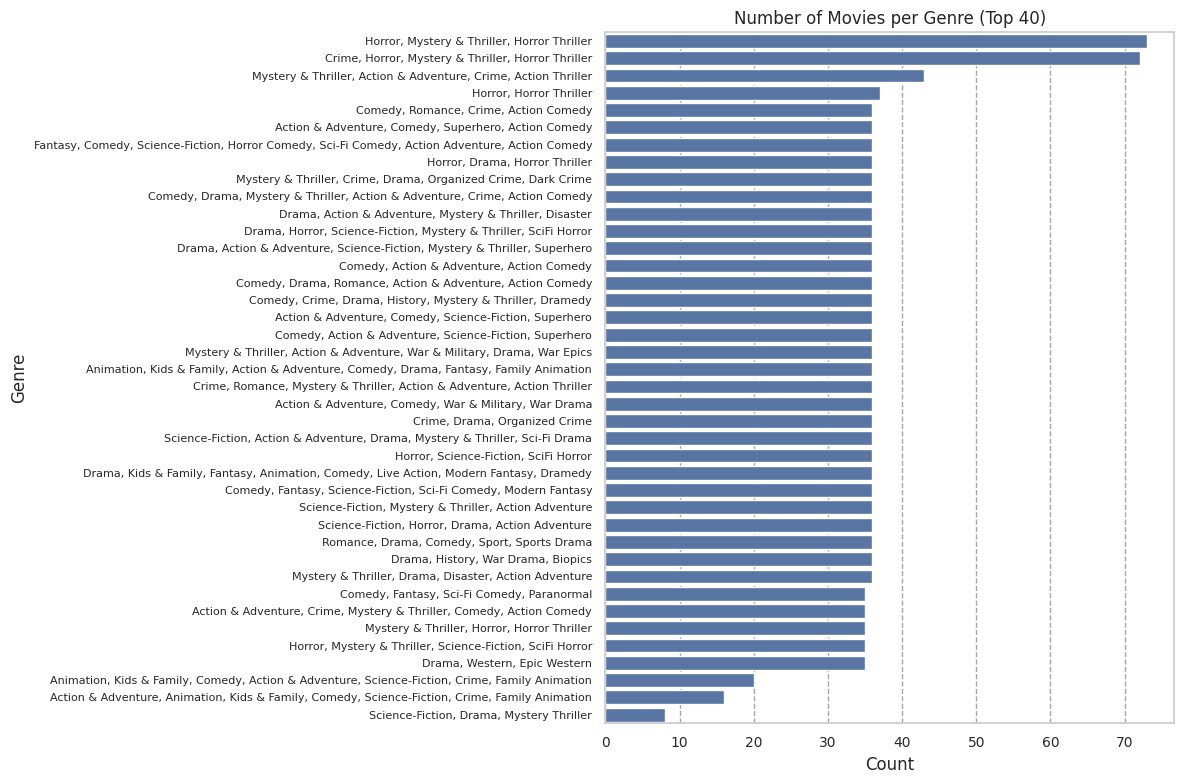

In [ ]:
# Count the number of movies by genre and select the top 50 genres
top_genres = df['movies_genre'].value_counts().nlargest(40).index

# Filter the dataframe to include only the top 40 genres
df_top_40 = df[df['movies_genre'].isin(top_genres)]

# Plot the count of movies for the top 40 genres
plt.figure(figsize=(12, 8))  # Increase figure size
sns.countplot(y='movies_genre', data=df_top_40, order=top_genres)

# Add gridlines behind the bars
plt.grid(axis='x', linestyle='--', color='grey', alpha=0.7)

# Customize the rest of the plot
plt.title('Number of Movies per Genre (Top 40)')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.xticks(fontsize=10)  # Adjust font size of x-axis
plt.yticks(fontsize=8)   # Adjust font size of y-axis
plt.tight_layout()       # Ensure everything fits

# Show the plot
plt.show()

# Save the plot
plt.savefig('1_Showing the count of movies per genre', dpi=300)
plt.close()

##2. Histogram - Distribution of IMDb ratings

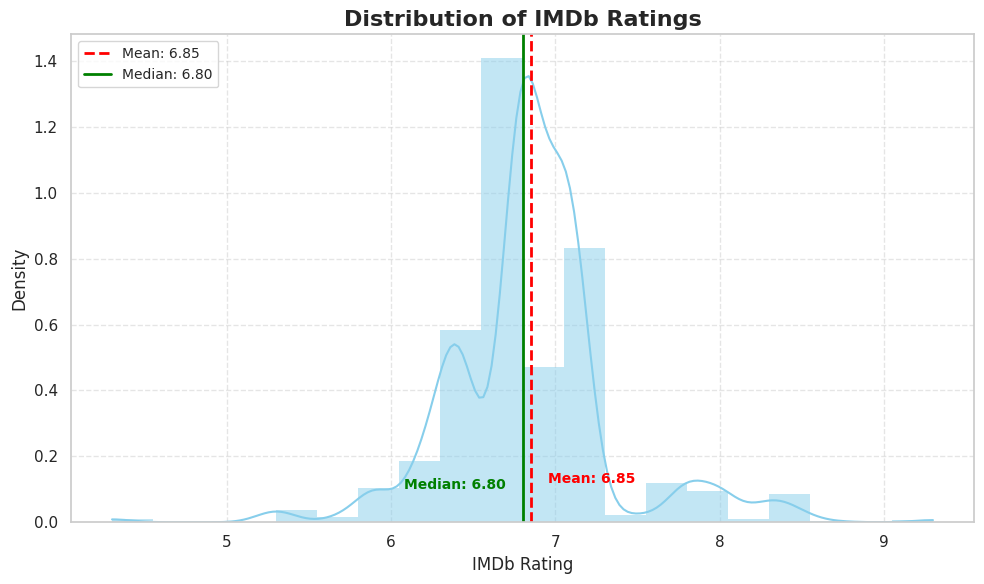

In [ ]:
# Convert the 'movies_imdb_rating' column to numeric values, forcing errors to NaN
df['movies_imdb_rating'] = pd.to_numeric(df['movies_imdb_rating'], errors='coerce')

# Drop or fill NaN values if necessary (optional)
# For example, you can drop rows with missing ratings
df = df.dropna(subset=['movies_imdb_rating'])

# Alternatively, you could fill NaN values with the mean or median
# df['movies_imdb_rating'].fillna(df['movies_imdb_rating'].mean(), inplace=True)
#---------------------------------------------------------------------------------------------------------------------------------
# Set a custom style for the plot
sns.set(style="whitegrid")

# Plot the IMDb rating distribution with a color gradient
plt.figure(figsize=(10, 6))

# Create the histogram with KDE and a color palette
sns.histplot(df['movies_imdb_rating'], bins=20, kde=True, color="skyblue", stat="density", linewidth=0, edgecolor=None)

# Calculate mean and median
mean_rating = df['movies_imdb_rating'].mean()
median_rating = df['movies_imdb_rating'].median()

# Add a vertical line for the mean
plt.axvline(mean_rating, color='red', linestyle='--', label=f'Mean: {mean_rating:.2f}', linewidth=2)

# Add a vertical line for the median with a slightly different style
plt.axvline(median_rating, color='green', linestyle='-', label=f'Median: {median_rating:.2f}', linewidth=2)

# Customize the plot appearance
plt.title('Distribution of IMDb Ratings', fontsize=16, weight='bold')
plt.xlabel('IMDb Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add a legend
plt.legend(loc='upper left', fontsize=10)

# Add text annotations with slight offset to avoid overlap
plt.text(mean_rating + 0.1, 0.12, f'Mean: {mean_rating:.2f}', color='red', fontsize=10, weight='bold', ha='left')
plt.text(median_rating - 0.1, 0.10, f'Median: {median_rating:.2f}', color='green', fontsize=10, weight='bold', ha='right')

# Add gridlines for better visual separation
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('2_Distribution of IMDb ratings', dpi=300)
plt.close()

##3. Box Plot with Violin Plot Overlay

 Visualize distribution and density of IMDb ratings by genre.

<ipython-input-53-621a0e636666>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-53-621a0e636666>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




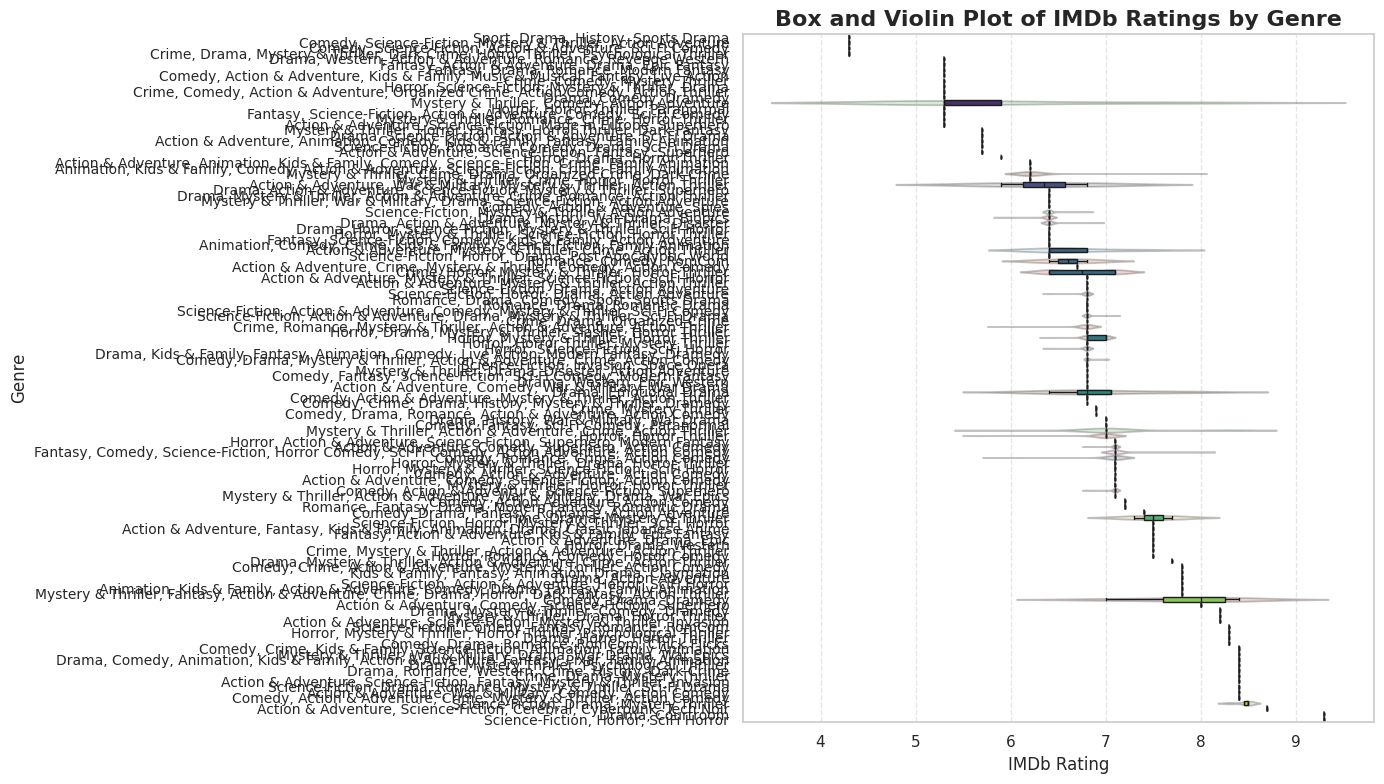

In [ ]:
# Set a custom style
sns.set(style="whitegrid")

# Increase figure size
plt.figure(figsize=(14, 8))

# Create the box plot
sns.boxplot(x='movies_imdb_rating', y='movies_genre', data=df, palette="viridis", showfliers=False)

# Overlay the violin plot
sns.violinplot(x='movies_imdb_rating', y='movies_genre', data=df, palette="muted", inner=None, alpha=0.3)

# Add title and labels
plt.title('Box and Violin Plot of IMDb Ratings by Genre', fontsize=16, weight='bold')
plt.xlabel('IMDb Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Rotate the y-axis labels if needed
plt.yticks(fontsize=10)

# Optional: Add gridlines
plt.grid(True, which='both', axis='x', linestyle='--', alpha=0.5)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot
plt.savefig('3_Box Plot with Violin Plot Overlay', dpi=300)
plt.close()

##4 Facet Grid with Histograms


Compare IMDb rating distributions across genres.

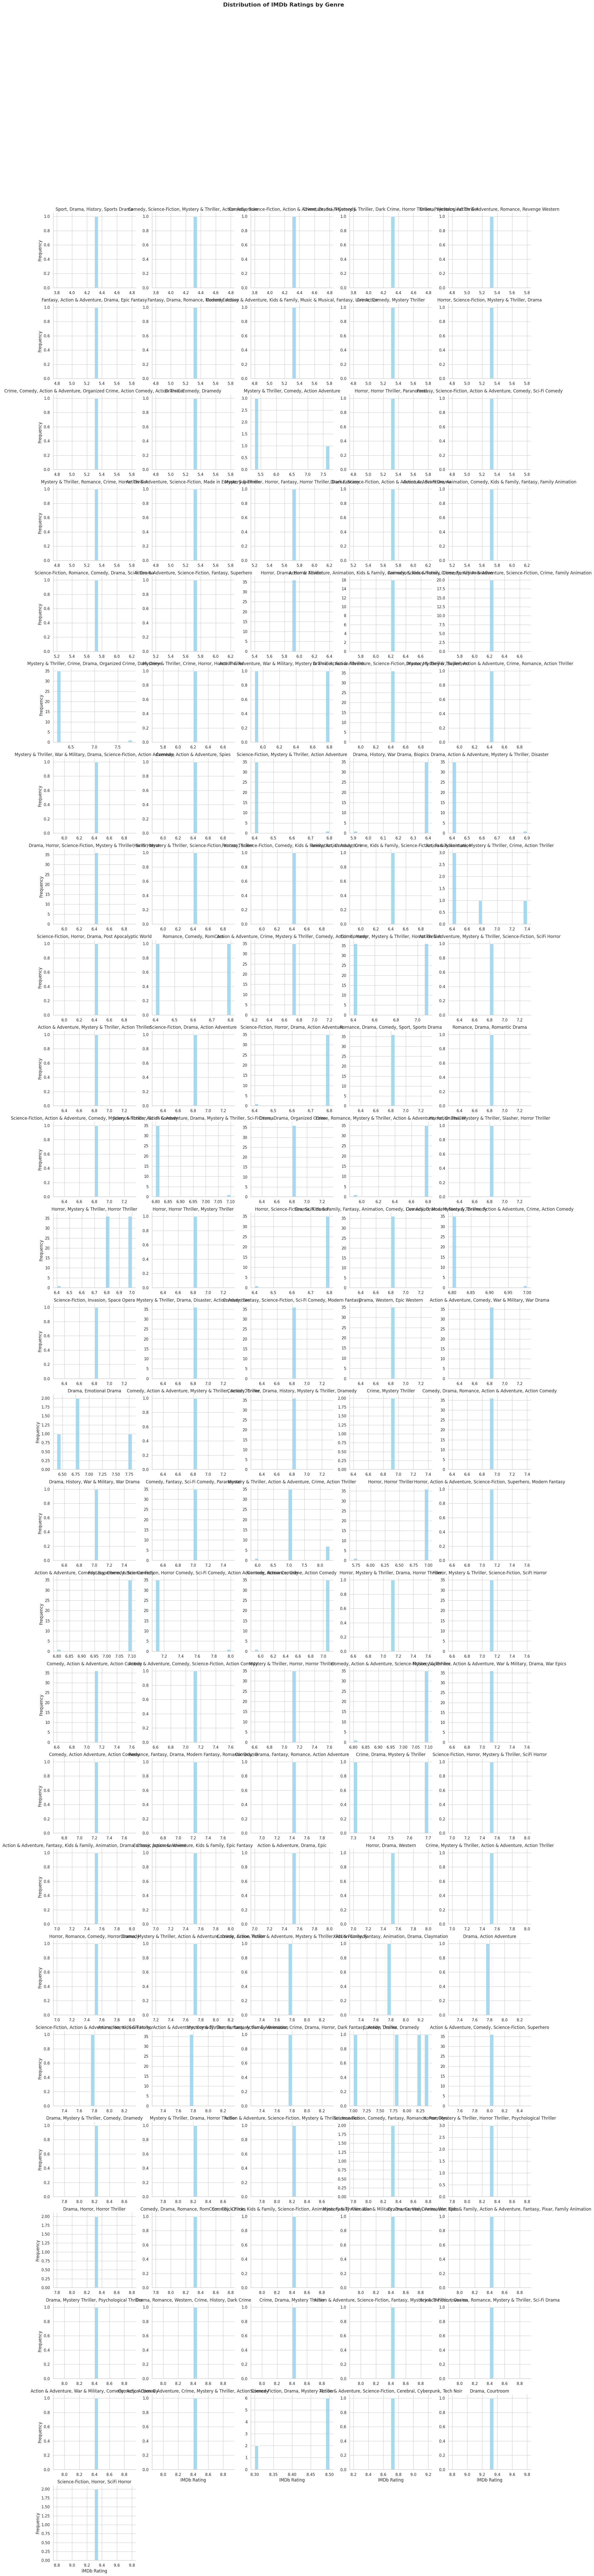

In [ ]:
# Set a custom style
sns.set(style="whitegrid")

# Create a FacetGrid with histograms for each genre
g = sns.FacetGrid(df, col='movies_genre', col_wrap=5, height=4, sharex=False, sharey=False)
g.map(sns.histplot, 'movies_imdb_rating', bins=20, kde=False, color='skyblue')

# Add titles and adjust layout
g.set_titles(col_template="{col_name}", size=12)
g.set_axis_labels("IMDb Rating", "Frequency")
g.fig.suptitle('Distribution of IMDb Ratings by Genre', fontsize=16, weight='bold')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()
# Save the plot
plt.savefig('4_Facet Grid with Histograms', dpi=300)
plt.close()

##5 Heatmap of Genre vs. Rating

Show the density of ratings for each genre.

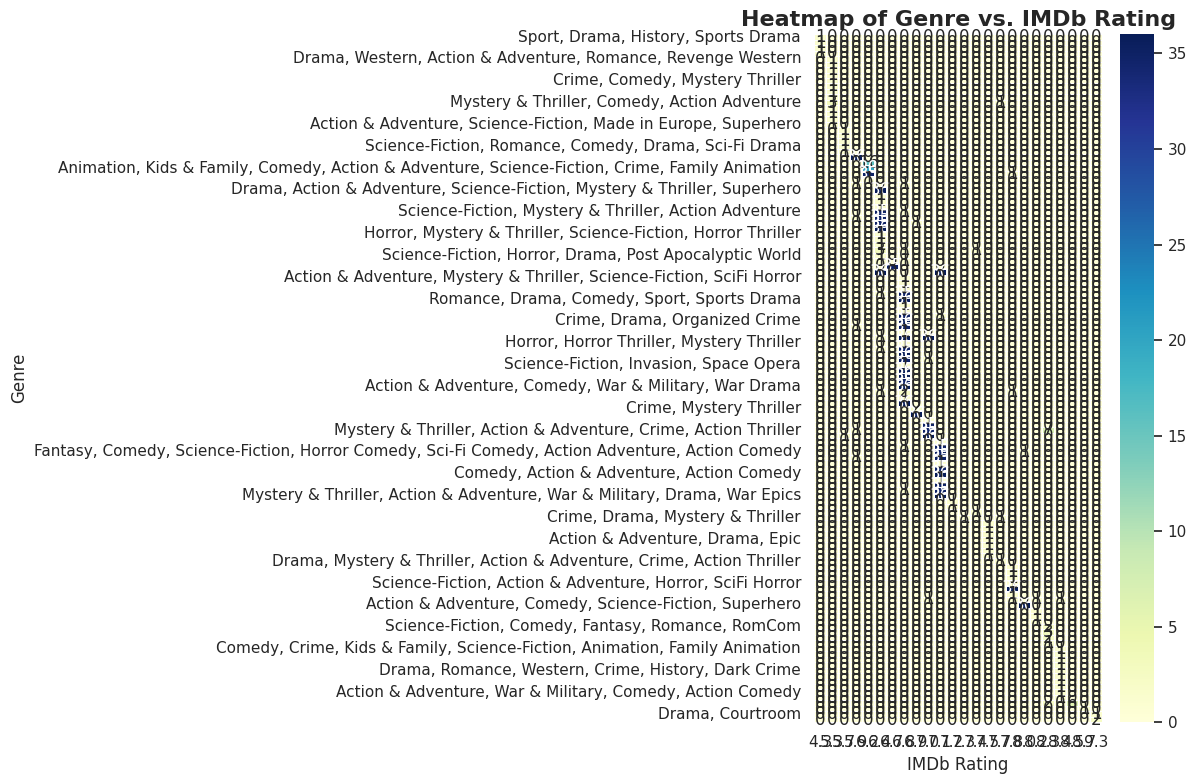

In [ ]:
# Create a pivot table
heatmap_data = df.pivot_table(index='movies_genre', columns='movies_imdb_rating', aggfunc='size', fill_value=0)

# Set a custom style
sns.set(style="whitegrid")

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)

# Add title and labels
plt.title('Heatmap of Genre vs. IMDb Rating', fontsize=16, weight='bold')
plt.xlabel('IMDb Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig('5_Heatmap_of_Genre_vs_Rating.png', dpi=300)
plt.close()

##6  Pair Plot of Numeric Features

Explore relationships between numeric features.

In [ ]:
# Prepare the DataFrame with relevant numeric features
numeric_df = df[['movies_imdb_rating', 'movies_runtime']].dropna()

# Set a custom style
sns.set(style="whitegrid")

# Create a pair plot
g = sns.pairplot(numeric_df, diag_kind='kde', plot_kws={'alpha':0.5})

# Add title with adjusted position
plt.suptitle('IMDb Ratings & Runtime', fontsize=10, weight='bold', y=0.95)  # Adjust y to move title down

# Adjust layout to make room for the title
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust rect to accommodate title

# Save the plot
plt.savefig('pair_plot.png', dpi=300)
plt.close()

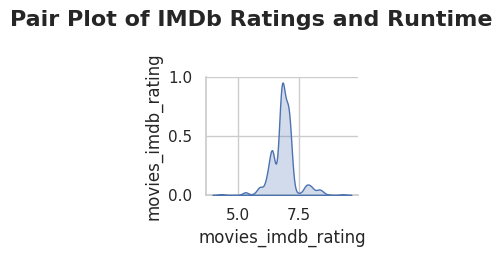

In [ ]:
# Prepare the DataFrame with relevant numeric features
numeric_df = df[['movies_imdb_rating', 'movies_runtime']].dropna()

# Set a custom style
sns.set(style="whitegrid")

# Create a pair plot
sns.pairplot(numeric_df, diag_kind='kde', plot_kws={'alpha':0.5})

# Add title
plt.suptitle('Pair Plot of IMDb Ratings and Runtime', fontsize=16, weight='bold', y=1.02)

# Show the plot
plt.tight_layout()
plt.show()

# Save the plot
plt.tight_layout()

# Convert the plot to HTML
html_str = mpld3.fig_to_html(plt.gcf())
with open('pair_plot.html', 'w') as f:
    f.write(html_str)

plt.close()

##7 Interactive Scatter Plot with Plotly

Explore IMDb ratings versus runtime interactively with Plotly.

In [ ]:
# pip uninstall -y kaleido
!pip install -U kaleido
!pip install -U plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
import kaleido

In [ ]:
!pip show kaleido

Name: kaleido
Version: 0.2.1
Summary: Static image export for web-based visualization libraries with zero dependencies
Home-page: UNKNOWN
Author: Jon Mease
Author-email: jon@plotly.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [ ]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(df, x='movies_imdb_rating', y='movies_runtime', color='movies_genre',
                 title='Interactive Scatter Plot of IMDb Ratings vs. Runtime',
                 labels={'movies_imdb_rating': 'IMDb Rating', 'movies_runtime': 'Runtime'},
                 hover_name='movies_title')

# Show the plot
fig.show()

import plotly.io as pio
# Save the plot as an HTML file
pio.write_html(fig, '7_Interactive_Scatter_Plot_with_Plotly.html')


/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
